In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# !pip install indic-nlp-library

In [13]:
import pandas as pd
import re
import random
from indicnlp.tokenize import indic_tokenize

file_name = '/content/drive/MyDrive/Datasets_HateSpeech/Telugu/Telugu.csv'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_name, encoding='utf-8')
df.head()

,transliterated_text,Label
0,తప్పు చేసిన వాళ్లకు వణికే కాదు ఇంకా అన్ని మొదల...,hate
1,దుస్తా చాతుర్యం మీరు ఇలాంటివి ఎన్ని చేసిన ఇఎం ...,hate
2,వెతకరం సూపర్ గోవ్ట్ కి సిగ్గు సెరమ్ రాదు ఎందుక...,hate
3,ఓన్లీ రాజకీయం గా వాడుకోవటానికే ఈ దరిద్రపు అరెస...,hate
4,కాటం హోగయా నారాయణ పెద్ద బోకడ కాలేజ్,hate


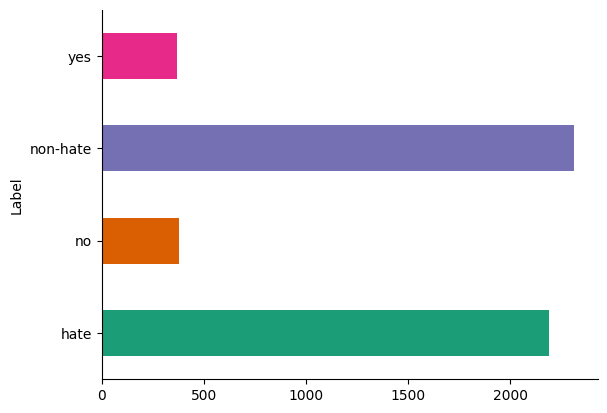

In [14]:
## ESSENTIALLY YES&HATE ARE THE SAME LABEL

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [15]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found. Removing duplicates...")
    df.drop_duplicates(inplace=True)

# Check for NaN values
nan_rows = df[df.isna().any(axis=1)]
if not nan_rows.empty:
    print("Rows with NaN values found. Removing...")
    df.dropna(inplace=True)

# Print length of the dataset after removing duplicates and NaN values
print("Length of the dataset after cleaning: ", len(df))

Duplicate rows found. Removing duplicates...
Rows with NaN values found. Removing...
Length of the dataset after cleaning:  5175


In [16]:
mapping_dict = {'yes': 1, 'hate': 1, 'non-hate':0, 'no': 0}
df["Labels Set"] = df["Label"].map(mapping_dict)
df['Processed_Post'] = df['transliterated_text']
df.head()

,transliterated_text,Label,Labels Set,Processed_Post
0,తప్పు చేసిన వాళ్లకు వణికే కాదు ఇంకా అన్ని మొదల...,hate,1,తప్పు చేసిన వాళ్లకు వణికే కాదు ఇంకా అన్ని మొదల...
1,దుస్తా చాతుర్యం మీరు ఇలాంటివి ఎన్ని చేసిన ఇఎం ...,hate,1,దుస్తా చాతుర్యం మీరు ఇలాంటివి ఎన్ని చేసిన ఇఎం ...
2,వెతకరం సూపర్ గోవ్ట్ కి సిగ్గు సెరమ్ రాదు ఎందుక...,hate,1,వెతకరం సూపర్ గోవ్ట్ కి సిగ్గు సెరమ్ రాదు ఎందుక...
3,ఓన్లీ రాజకీయం గా వాడుకోవటానికే ఈ దరిద్రపు అరెస...,hate,1,ఓన్లీ రాజకీయం గా వాడుకోవటానికే ఈ దరిద్రపు అరెస...
4,కాటం హోగయా నారాయణ పెద్ద బోకడ కాలేజ్,hate,1,కాటం హోగయా నారాయణ పెద్ద బోకడ కాలేజ్


In [17]:
train_hate_df = df[df["Labels Set"] == 1].copy()
train_non_hate_df = df[df["Labels Set"] == 0].copy()

sampled_hate_df = train_hate_df.sample(n=2500, random_state=42)
sampled_non_hate_df = train_non_hate_df.sample(n=2500, random_state=42)

train_sampled_hate_df = sampled_hate_df.iloc[:2000]
train_sampled_non_hate_df = sampled_non_hate_df.iloc[:2000]

train_concatenated_df = pd.concat([train_sampled_hate_df, train_sampled_non_hate_df], axis=0)
train_df = train_concatenated_df.sample(frac=1, random_state=42).reset_index(drop=True)

test_sampled_hate_df = sampled_hate_df.iloc[-500:]
test_sampled_non_hate_df = sampled_non_hate_df.iloc[-500:]

test_concatenated_df = pd.concat([test_sampled_hate_df, test_sampled_non_hate_df], axis=0)
test_df = test_concatenated_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [19]:
test_df[test_df['Labels Set'] == 1]

,transliterated_text,Label,Labels Set,Processed_Post
4,అరే చెప్పు తో కొడతా,hate,1,అరే చెప్పు తో కొడతా
9,తెలంగాణ ప్రజల ప్రాణాలతో ఓచినా పదవి నీదినువ్వు ...,hate,1,తెలంగాణ ప్రజల ప్రాణాలతో ఓచినా పదవి నీదినువ్వు ...
11,కోడెలకు సహకరించిన అధికారులు కూడా దోషులేనని విజ...,yes,1,కోడెలకు సహకరించిన అధికారులు కూడా దోషులేనని విజ...
16,ఈఈ సుమా ఓవరాక్షన్ రోటా గా ఉంది,hate,1,ఈఈ సుమా ఓవరాక్షన్ రోటా గా ఉంది
19,రాజా సింగ్ నువ్వు ని కర్ర తగుబ్తూ మొకం నీకు మొ...,hate,1,రాజా సింగ్ నువ్వు ని కర్ర తగుబ్తూ మొకం నీకు మొ...
...,...,...,...,...
994,బోండా ఉమా ది ఒక కుక్క జీవితం అదేస్ఖా,hate,1,బోండా ఉమా ది ఒక కుక్క జీవితం అదేస్ఖా
995,న్తర్ గారి జీవిత చరిత్ర రాస్తా అని చెప్పి ఆయన ...,hate,1,న్తర్ గారి జీవిత చరిత్ర రాస్తా అని చెప్పి ఆయన ...
996,అస్లా కేఎల్ రాహుల్ పెద్ద బోగ్ నా కొడుకు అడతం ర...,hate,1,అస్లా కేఎల్ రాహుల్ పెద్ద బోగ్ నా కొడుకు అడతం ర...
998,నేను ఓపెనహార్ట్ విత్ ర్క్ తప్పక చూస్తుంటా ఇంత ...,hate,1,నేను ఓపెనహార్ట్ విత్ ర్క్ తప్పక చూస్తుంటా ఇంత ...


In [20]:
train_df[train_df['Labels Set'] == 1]

,transliterated_text,Label,Labels Set,Processed_Post
0,అది సిగ్రేట్ తాగుతుంది అబ్జర్వ్ చేసారా,hate,1,అది సిగ్రేట్ తాగుతుంది అబ్జర్వ్ చేసారా
2,తమ పార్టీ గుర్తుపై గెలిచిన 23 మందిని గత ప్రభుత...,yes,1,తమ పార్టీ గుర్తుపై గెలిచిన 23 మందిని గత ప్రభుత...
5,ఇది ఆర్టీసీ కండక్టర్ హా లేక ఇంకా బస్టాండ్ లో ఏ...,hate,1,ఇది ఆర్టీసీ కండక్టర్ హా లేక ఇంకా బస్టాండ్ లో ఏ...
6,సోధి తప్ప ఇఎం లేదు ఇందులో చెప్పింది చెప్పి ఒకట...,hate,1,సోధి తప్ప ఇఎం లేదు ఇందులో చెప్పింది చెప్పి ఒకట...
7,వినేవాళ్లు వెర్రిపప్పలితే ఏదినా చెప్తారినమ్మంద...,hate,1,వినేవాళ్లు వెర్రిపప్పలితే ఏదినా చెప్తారినమ్మంద...
...,...,...,...,...
3991,"మరి పార్టీ లేదు, బొక్క లేదు అన్నావ్",hate,1,"మరి పార్టీ లేదు, బొక్క లేదు అన్నావ్"
3994,ఎలాంటి అన్నీ వీడియోలు చేసిన కాగన్ ఇకా కూడా పిక...,hate,1,ఎలాంటి అన్నీ వీడియోలు చేసిన కాగన్ ఇకా కూడా పిక...
3995,దీనికి క్ కొవ్వు బాగా పెరిగింది,hate,1,దీనికి క్ కొవ్వు బాగా పెరిగింది
3996,నువ్ మాట్లాడిన వస్తే రా,hate,1,నువ్ మాట్లాడిన వస్తే రా


In [21]:
# Define the new filename for saving the preprocessed data
train_file = file_name.split('.')[0] + '_train.csv'

# Save the preprocessed data to a new CSV file
train_df.to_csv(train_file, index=False, encoding='utf-8')

In [22]:
# Define the new filename for saving the preprocessed data
test_file = file_name.split('.')[0] + '_test.csv'

# Save the preprocessed data to a new CSV file
test_df.to_csv(test_file, index=False, encoding='utf-8')